<a href="https://colab.research.google.com/github/grzegorzx/manhattan_rent_prediction/blob/main/Multi_Linear_Regression_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

df = pd.DataFrame(streeteasy)

Split the data to train and test datasets.

In [ ]:
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway','floor','building_age_yrs','no_fee', 'has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']]
y = df['rent']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=6)

Check if the dimensions are the same.

In [ ]:
x_train.shape[0] == y_train.shape[0]
x_test.shape[0] == x_test.shape[0]

True

Create linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predicted = mlr.predict(x_test)

With model created, see the predictions against actual prices.

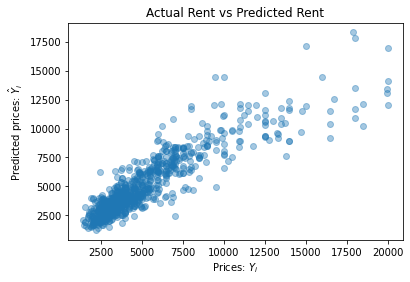

In [ ]:
plt.scatter(y_test,y_predicted, alpha=0.4)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [ ]:
print(mlr.coef_)
print(mlr.intercept_)

[-290.09178995 1163.85950125    4.80741931  -24.22110312   24.89946155
   -7.31277156 -110.22803314   48.01786061  161.79724239 -130.76214437
   76.99406149  -45.37726665    4.13955622  -33.53391278]
-354.64003119460267


In [ ]:
print(mlr.score(x_train, y_train))
print(mlr.score(x_test, y_test))

0.7711803921639117
0.8015755539213808


See if removing unnecessary features increase coefficiency.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1.000000,-0.134347,-0.070290,-0.109414,-0.107711,0.009615,-0.082586,0.028543,0.064919,-0.023335,-0.072738,-0.057786,-0.060152,-0.029615,-0.004253,-0.023457
rent,-0.134347,1.000000,0.638336,0.769474,0.857954,0.035164,0.215867,-0.128895,-0.101497,0.035165,0.053873,0.031302,0.051860,0.052241,0.029302,0.040609
bedrooms,-0.070290,0.638336,1.000000,0.720885,0.771263,0.076543,0.043539,0.037228,-0.100352,0.002938,0.008721,-0.017331,-0.006771,0.005467,0.003037,-0.004112
bathrooms,-0.109414,0.769474,0.720885,1.000000,0.803627,0.086932,0.127969,-0.095421,-0.062205,0.019556,0.025752,0.014745,0.021150,0.038829,0.042304,0.029739
size_sqft,-0.107711,0.857954,0.771263,0.803627,1.000000,0.039448,0.107186,0.014489,-0.141451,0.024822,0.038263,0.026098,0.040916,0.050364,0.021921,0.029347
min_to_subway,0.009615,0.035164,0.076543,0.086932,0.039448,1.000000,0.082445,-0.184682,0.080088,-0.020693,-0.001327,-0.009012,-0.000410,-0.012244,0.001500,-0.004315
floor,-0.082586,0.215867,0.043539,0.127969,0.107186,0.082445,1.000000,-0.389260,0.104317,0.056322,0.038870,0.095963,0.068917,0.002337,0.059423,0.065410
building_age_yrs,0.028543,-0.128895,0.037228,-0.095421,0.014489,-0.184682,-0.389260,1.000000,-0.221429,-0.041305,-0.030014,-0.047265,-0.060627,-0.027420,-0.050321,-0.063110
no_fee,0.064919,-0.101497,-0.100352,-0.062205,-0.141451,0.080088,0.104317,-0.221429,1.000000,-0.095718,-0.070324,-0.182547,-0.161519,-0.078660,-0.049684,-0.101230
has_roofdeck,-0.023335,0.035165,0.002938,0.019556,0.024822,-0.020693,0.056322,-0.041305,-0.095718,1.000000,0.313459,0.489836,0.516534,0.331999,0.122568,0.561626


In [ ]:
x_new = df[['size_sqft', 'bathrooms', 'bedrooms', 'floor','building_age_yrs']]
x_train, x_test, y_train, y_test = train_test_split(x_new,y,random_state=6)

In [ ]:
x_train.shape[0] == y_train.shape[0]
x_test.shape[0] == x_test.shape[0]

True

In [ ]:
mlr_new = LinearRegression()
mlr_new.fit(x_train, y_train)
y_predicted = mlr_new.predict(x_test)

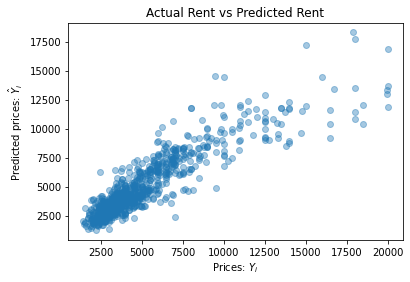

In [ ]:
plt.scatter(y_test,y_predicted, alpha=0.4)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [ ]:
print(mlr_new.coef_)
print(mlr_new.intercept_)
print(mlr_new.score(x_train, y_train))
print(mlr_new.score(x_test, y_test))

[   4.86322491 1139.98269869 -302.93427814   24.51512254   -6.49972439]
-553.8751656318673
0.768793738462685
0.80320810385003


It seems that with given dataset, the largest coefficient of determination we are able to achieve is 0.8.

Let's play and see how bad we can go with that excercise.

In [ ]:
x_bad = df[['min_to_subway', 'has_patio', 'has_doorman']]
x_train, x_test, y_train, y_test = train_test_split(x_bad,y,random_state=6)
mlr_bad = LinearRegression()
mlr_bad.fit(x_train, y_train)
y_predicted = mlr_bad.predict(x_test)

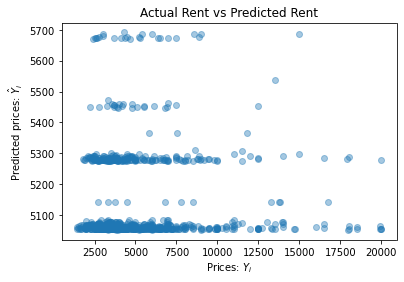

In [ ]:
plt.scatter(y_test,y_predicted, alpha=0.4)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")
plt.show()

In [ ]:
print(mlr_bad.coef_)
print(mlr_bad.intercept_)
print(mlr_bad.score(x_train, y_train))
print(mlr_bad.score(x_test, y_test))

[  2.13978831 395.01277878 222.61839695]
5050.918136318661
0.0020966316168214982
0.0009415691939859139


As we can see, choosing only the features with highest coefficiency results in high quality prediction.

As the last thing, we can predict a price based on example patameters (and using the best version of the model) - I'm using my London's apartment parameters.

In [ ]:
example_apartment = [[538,1,1,1,5]]
 
predict = mlr_new.predict(example_apartment)
predict[0]

2891.6047563485267